In [79]:
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import ModelCheckpoint

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('bmh')

In [123]:
df_ozon = pd.read_csv('C:/Users/AMM/MP/OZON Тетчер 02_2022-07_2023.csv',index_col=[0], parse_dates=[0])

In [124]:
df_ozon

,hits_view,hits_tocart,session_view_search,session_view_pdp,session_view,conv_tocart_search,conv_tocart_pdp,conv_tocart,revenue,ordered_units,position_category
id,,,,,,,,,,,
2022-02-01,0,0,0,0,0,0.00,0.00,0.00,0,0,0.000000
2022-02-02,1,0,0,0,1,0.00,0.00,0.00,0,0,0.000000
2022-02-03,5,0,0,1,2,0.00,0.00,0.00,0,0,0.000000
2022-02-04,2,0,0,0,1,0.00,0.00,0.00,0,0,0.000000
2022-02-05,0,0,0,0,0,0.00,0.00,0.00,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27,635620,507,33306,4667,87384,0.39,8.05,0.58,462662,50,46.293602
2023-06-28,498278,483,31152,4264,71890,0.38,8.51,0.67,442757,55,63.142850
2023-06-29,320498,452,26221,3811,59328,0.28,9.91,0.76,664540,78,108.113835


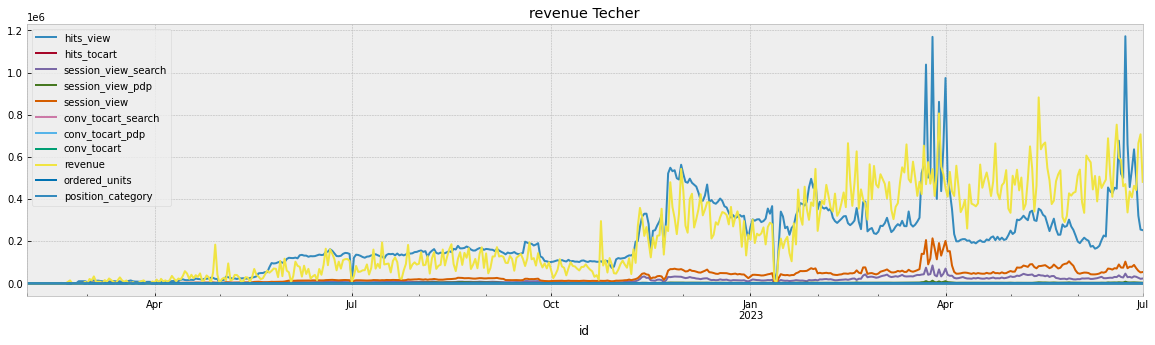

In [125]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df_ozon.plot(style='-', figsize=(20,5), title='revenue Techer')

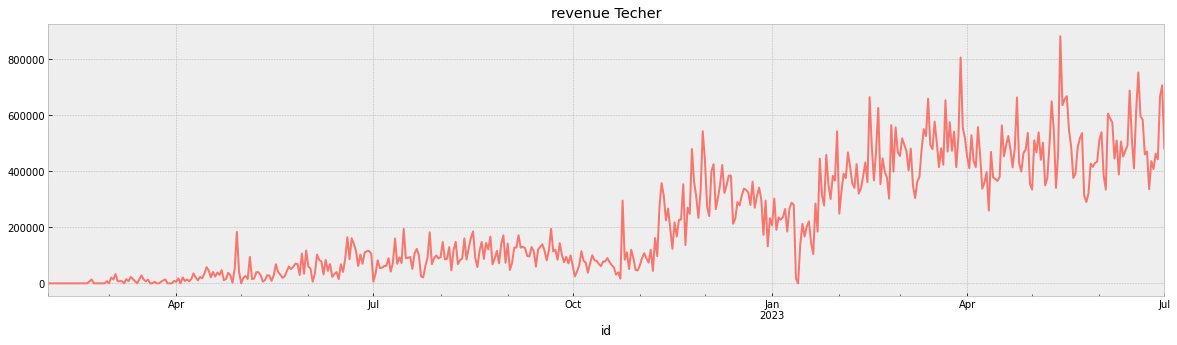

In [126]:
_ = df_ozon['revenue'].plot(style='-', figsize=(20,5), color=color_pal[0], title='revenue Techer')

<AxesSubplot:>

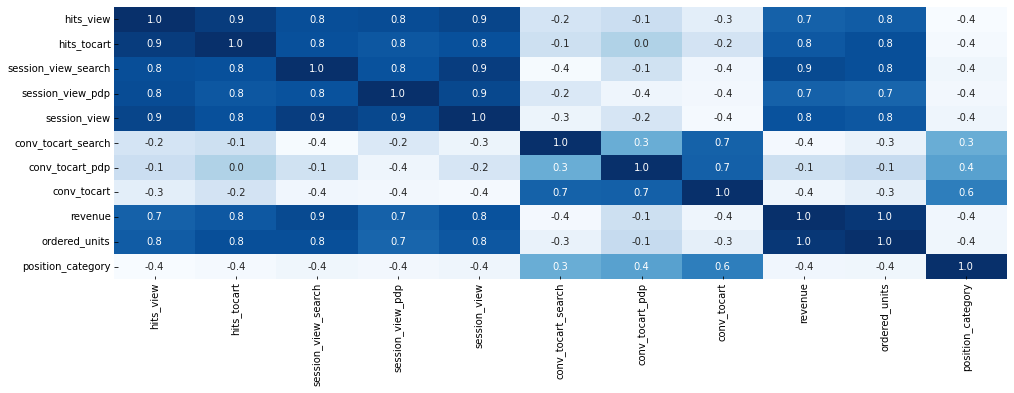

In [127]:
corrmat = df_ozon.corr()
plt.figure(figsize = (16,5))
top_corr_features = corrmat.index
sns.heatmap(df_ozon[top_corr_features].corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')


In [128]:
# Выбираю колонки feature которые будут учитыватсья в обучении
x = df_ozon[['hits_view','hits_tocart','conv_tocart_pdp','ordered_units', 'session_view_pdp']]
y = df_ozon[['revenue']]

In [129]:
print(x.shape)
print(y.shape)

(516, 5)
(516, 1)


In [130]:
# Разбиваем  данные на обучающую, валидационную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [131]:
# Определяю размеры выборок
train_size = int(len(x) * 0.8)  # 80% для обучения
valid_size = int(len(x) * 0.1)  # 10% для валидации
test_size = len(x) - train_size - valid_size  # остаток для тестирования

In [132]:
print('train_size :', train_size)
print('test_size : ', test_size)
print('valid_size :', valid_size)

train_size : 412
test_size :  53
valid_size : 51


In [135]:
# Разделение на обучающую, валидационную и тестовую выборки
x_train_f = x[:train_size]
x_valid_f = x[train_size:train_size+valid_size]
x_test_f = x[train_size+valid_size:]

y_train_f = y[:train_size]
print(len(y_train_f))
y_valid_f = y[train_size:train_size+valid_size]
print(len(y_valid_f))
y_test_f =  y[train_size+valid_size:]
print(len(y_test_f))

412
51
53


In [145]:
y_train_arr = np.array([y_train['revenue']])
y_train_arr

array([[ 84990,  68055,  52274,      0,  61820, 407806,  71079,      0,
        427061,  88390, 259991, 484680,      0, 398102, 541636, 536939,
        119670, 464782, 106320, 410559,  89100, 236860,  61640, 340414,
         44180, 136489, 366971,  40077,  15597, 659061, 367554,      0,
        312040,  34060, 494673,   6090, 542973,  40660,  46533, 100827,
         68130,  34860,  64500,  87270,  78338, 388633, 127876, 240262,
          7200, 510502,  29569, 320236,      0, 248772, 143538,   7690,
         92590, 110560,      0, 467439, 492043, 139570,  89760, 525874,
             0,  94680, 353828,  31760, 472867, 301009, 429394, 102924,
        436504,  33970,      0,  10580,  73510,  42130, 117017, 140637,
        545581, 287801, 381400, 118366,  17680, 265510, 206790,  60107,
        510759,  90009, 351708, 354188, 212588, 320300,  75825, 564787,
         41650, 493145, 473001, 398935,  92189,  16780, 232120,  99907,
        194570, 456919, 584537, 129670,   5890, 664764, 423590, 

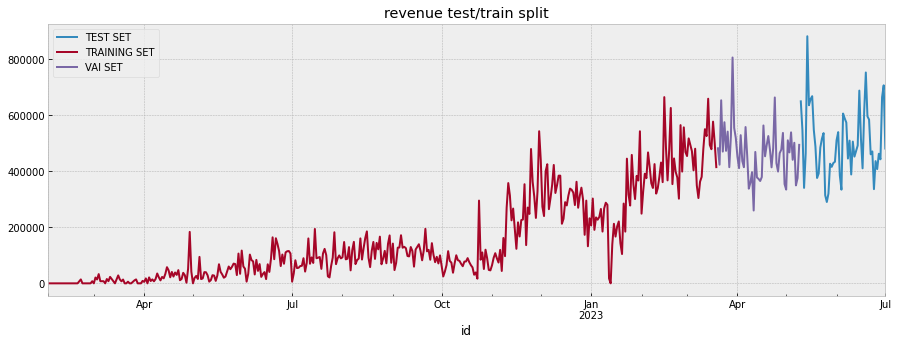

In [136]:
# График распределения на train/test/val
_ = y_test_f \
    .rename(columns={'revenue': 'TEST SET'}) \
    .join(y_train_f.rename(columns={'revenue': 'TRAINING SET'}), how='outer') \
    .join(y_valid_f.rename(columns={'revenue': 'VAl SET'}), how='outer') \
    .plot(figsize=(15,5), title='revenue test/train split', style='-')

In [101]:
# Стандартизирую данные
scaler = StandardScaler()
# Применяем стандартизацию к данным
x_train = scaler.fit_transform(x_train_f)
y_train = scaler.fit_transform(y_train_f)

# Применяем стандартизацию к данным
x_test = scaler.fit_transform(x_test_f)
y_test = scaler.fit_transform(y_test_f)

# Применяем стандартизацию к данным
x_valid = scaler.fit_transform(x_valid_f)
y_valid = scaler.fit_transform(y_valid_f)

In [113]:
y_train

array([[-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.32312876e-01],
       [-8.86292868e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.78438343e-01],
       [-9.27751740e-01],
       [-9.78438343e-01],
       [-8.41584517e-01],
       [-8.87202459e-01],
       [-7.61026435e-01],
       [-9.27751740e-01],
       [-9.27751740e-01],
       [-9.27751740e-01],
       [-9.78438343e-01],
       [-8.77065138e-01],
       [-9.27751740e-01],
       [-8.2

In [102]:
time_steps = 1 # размер окна, можно поиграться с этим параметром
features = x.shape[1]
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))
y_train2 = np.zeros((x_train.shape[0] - time_steps + 1))

# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train[i:i+time_steps]
    y_train2[i] = y_train[i:i+1].flatten()

print(x_train2.shape,y_train2.shape)

(412, 1, 5) (412,)


In [95]:
x_train2

array([[[-1.20111179, -1.12966983, -2.08931788, -0.9421122 ,
         -1.12677596]],

       [[-1.20110442, -1.12966983, -2.08931788, -0.9421122 ,
         -1.12677596]],

       [[-1.20107493, -1.12966983, -2.08931788, -0.9421122 ,
         -1.12604057]],

       ...,

       [[ 0.78319193,  0.65896027, -0.64504979,  2.15166643,
          1.37058786]],

       [[ 0.84977153,  0.71257043, -0.6399881 ,  2.15166643,
          1.55002154]],

       [[ 0.95980627,  1.20968288, -0.54719051,  1.48531411,
          1.78534439]]])

In [110]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))
y_test2 = np.zeros((x_test.shape[0] - time_steps + 1))
# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test[i:i+time_steps]
    y_test2[i] = y_test[i:i+1].flatten()

print(x_test2.shape, y_test2.shape)

(53, 1, 5) (53,)


In [111]:
y_test2

array([ 1.21651988,  0.35336921, -1.34463552, -0.32459735,  3.14293715,
        1.10168351,  1.28246519,  1.36928683,  0.36922129, -0.1236938 ,
       -1.05199387, -0.9179725 , -0.15155101,  0.11491647,  0.27713497,
       -1.56272597, -1.76217861, -1.51492929, -0.62926071, -0.72226731,
       -0.60991819, -0.57131605,  0.06466571,  0.30510825, -0.9739771 ,
       -1.39692582,  0.85573585,  0.71250336,  0.58855536, -0.4760046 ,
        0.05440165, -0.94786096,  0.02541689, -0.41920408, -0.24949066,
       -0.09050558,  1.53468073,  0.11256187, -0.76607609,  0.92973986,
        2.07079936,  0.77229687,  0.67634703, -0.35108657, -0.2662879 ,
       -1.38160436, -0.55275287, -0.78890076, -0.33409865, -0.49912774,
        1.3396388 ,  1.69101273, -0.18005491])

In [97]:
# Инициализация массива x_valid
x_valid2 = np.zeros((x_valid.shape[0] - time_steps + 1, time_steps, features))
y_valid2 = np.zeros((x_valid.shape[0] - time_steps + 1))
# Заполнение массива x_valid окнами размером time_steps
for i in range(x_valid.shape[0] - time_steps + 1):
    x_valid2[i] = x_valid[i:i+time_steps]
    y_valid2[i] = y_valid[i:i+1].flatten()

print(x_valid2.shape, y_valid2.shape)

(51, 1, 5) (51,)


In [104]:
model2 = Sequential()
model2.add(SimpleRNN(units=50, input_shape=(time_steps, features)))
# model2.add(Dense(units = 750))
# model2.add(Dropout(0.25))
model2.add(Dense(units = 550))
model2.add(Dropout(0.15))
model2.add(Dense(units = 250))
model2.add(Dropout(0.10))
model2.add(Dense(units = 100))
model2.add(Dense(units=1))
model2.compile(loss='MeanSquaredError', optimizer='Adam')
model2.fit(x_train2, y_train2, epochs=50, batch_size=4, validation_data=(x_valid2, y_valid2))

Epoch 1/50
103/103 [==============================] - 2s 12ms/step - loss: 0.1586 - val_loss: 0.2472
Epoch 2/50
103/103 [==============================] - 1s 8ms/step - loss: 0.1097 - val_loss: 0.3606
Epoch 3/50
103/103 [==============================] - 1s 8ms/step - loss: 0.0829 - val_loss: 0.5101
Epoch 4/50
103/103 [==============================] - 1s 8ms/step - loss: 0.0890 - val_loss: 0.3349
Epoch 5/50
103/103 [==============================] - 1s 8ms/step - loss: 0.0879 - val_loss: 0.4897
Epoch 6/50
103/103 [==============================] - 1s 8ms/step - loss: 0.0949 - val_loss: 0.3330
Epoch 7/50
103/103 [==============================] - 1s 8ms/step - loss: 0.0960 - val_loss: 0.3212
Epoch 8/50
103/103 [==============================] - 1s 8ms/step - loss: 0.0690 - val_loss: 0.5485
Epoch 9/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0653 - val_loss: 0.4696
Epoch 10/50
103/103 [==============================] - 1s 8ms/step - loss: 0.0894 - val_loss: 0.404

In [ ]:
model2.fit(x_train2, y_train2, epochs=5, batch_size=2, validation_data=(x_test2, y_test2))

Epoch 1/5
206/206 [==============================] - 3s 10ms/step - loss: 0.0518 - val_loss: 0.4486
Epoch 2/5
206/206 [==============================] - 2s 9ms/step - loss: 0.0404 - val_loss: 0.4180
Epoch 3/5
206/206 [==============================] - 2s 9ms/step - loss: 0.0552 - val_loss: 0.3529
Epoch 4/5
206/206 [==============================] - 2s 9ms/step - loss: 0.0538 - val_loss: 0.4837
Epoch 5/5
206/206 [==============================] - 2s 9ms/step - loss: 0.0652 - val_loss: 0.3915


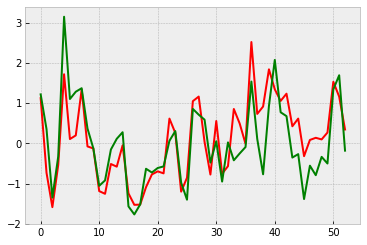

In [162]:
# График предикта и тестовой выборки
pref_dfv1 = model2.predict(x_test2)
plt.plot(pref_dfv1,color='red')
plt.plot(y_test2,color='green')

In [165]:
actual = scaler.inverse_transform(pref_dfv1)
y_test_f['My Pred'] = actual

C:\Users\AMM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


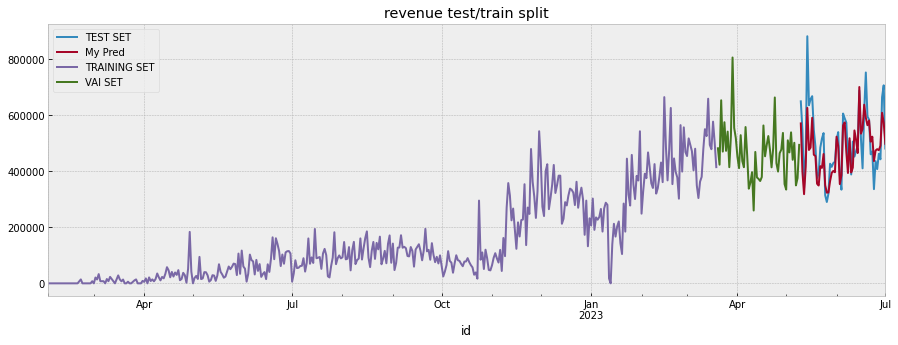

In [166]:
# Общий график по предикту продаж
_ = y_test_f \
    .rename(columns={'revenue': 'TEST SET'}) \
    .join(y_train_f.rename(columns={'revenue': 'TRAINING SET'}), how='outer') \
    .join(y_valid_f.rename(columns={'revenue': 'VAl SET'}), how='outer') \
    .plot(figsize=(15,5), title='revenue predict', style='-')

In [168]:
from keras.layers import LSTM

In [175]:
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, features)))
model.add(Dense(units = 550))
model.add(Dropout(0.15))
model.add(Dense(units = 250))
model.add(Dropout(0.10))
model.add(Dense(units = 100))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(x_train2, y_train2, epochs=50, batch_size=8, validation_data=(x_valid2, y_valid2),verbose=2, shuffle=False)

Epoch 1/50
52/52 - 4s - loss: 0.1390 - val_loss: 0.8583 - 4s/epoch - 68ms/step
Epoch 2/50
52/52 - 1s - loss: 0.1723 - val_loss: 0.4622 - 508ms/epoch - 10ms/step
Epoch 3/50
52/52 - 0s - loss: 0.1776 - val_loss: 0.7875 - 485ms/epoch - 9ms/step
Epoch 4/50
52/52 - 0s - loss: 0.1615 - val_loss: 0.4346 - 494ms/epoch - 10ms/step
Epoch 5/50
52/52 - 1s - loss: 0.6026 - val_loss: 2.7373 - 502ms/epoch - 10ms/step
Epoch 6/50
52/52 - 0s - loss: 0.8459 - val_loss: 0.7579 - 480ms/epoch - 9ms/step
Epoch 7/50
52/52 - 0s - loss: 0.4777 - val_loss: 0.6946 - 483ms/epoch - 9ms/step
Epoch 8/50
52/52 - 1s - loss: 1.2043 - val_loss: 0.9612 - 507ms/epoch - 10ms/step
Epoch 9/50
52/52 - 1s - loss: 0.4878 - val_loss: 0.7751 - 505ms/epoch - 10ms/step
Epoch 10/50
52/52 - 0s - loss: 0.5120 - val_loss: 0.4681 - 481ms/epoch - 9ms/step
Epoch 11/50
52/52 - 0s - loss: 0.4709 - val_loss: 0.6656 - 498ms/epoch - 10ms/step
Epoch 12/50
52/52 - 0s - loss: 0.1852 - val_loss: 0.2560 - 497ms/epoch - 10ms/step
Epoch 13/50
52/52 - 

In [55]:
model.fit(x_train2, y_train2, epochs=5, batch_size=2, validation_data=(x_test2, y_test2))

Epoch 1/5
204/204 [==============================] - 3s 11ms/step - loss: 0.1895 - val_loss: 0.4533
Epoch 2/5
204/204 [==============================] - 2s 10ms/step - loss: 0.1728 - val_loss: 0.3568
Epoch 3/5
204/204 [==============================] - 2s 10ms/step - loss: 0.1708 - val_loss: 0.3777
Epoch 4/5
204/204 [==============================] - 2s 10ms/step - loss: 0.1690 - val_loss: 0.3251
Epoch 5/5
204/204 [==============================] - 2s 10ms/step - loss: 0.1561 - val_loss: 0.3801


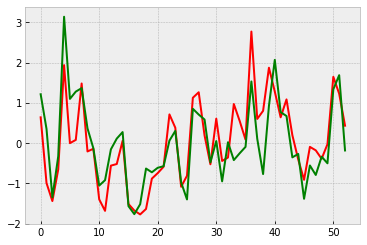

In [176]:
pref_dfv2 = model.predict(x_test2)
plt.plot(pref_dfv2,color='red')
plt.plot(y_test2,color='green')

In [177]:
actual2 = scaler.inverse_transform(pref_dfv2)
y_test_f['My Pred'] = actual2

C:\Users\AMM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


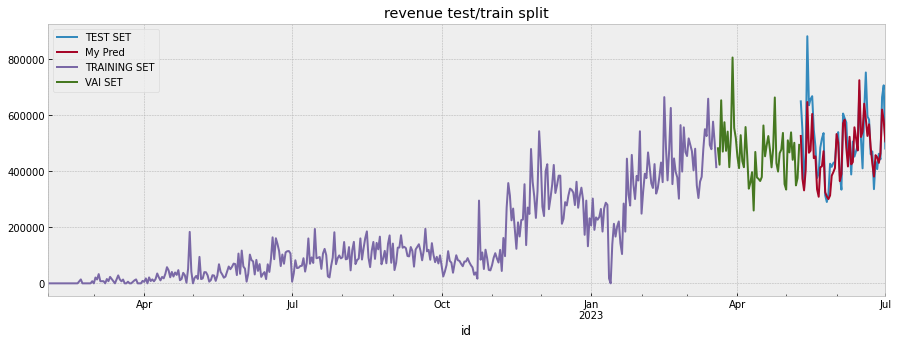

In [178]:
# LSTM дает схожие результаты
_ = y_test_f \
    .rename(columns={'revenue': 'TEST SET'}) \
    .join(y_train_f.rename(columns={'revenue': 'TRAINING SET'}), how='outer') \
    .join(y_valid_f.rename(columns={'revenue': 'VAl SET'}), how='outer') \
    .plot(figsize=(15,5), title='revenue test/train split', style='-')

In [42]:
# mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# model3 = Sequential()
# model3.add(SimpleRNN(units=50, input_shape=(time_steps, features)))
# # model2.add(Dense(units = 750))
# # model2.add(Dropout(0.25))
# model3.add(Dense(units = 550))
# model3.add(Dropout(0.15))
# model3.add(Dense(units = 250))
# model3.add(Dropout(0.10))
# model3.add(Dense(units = 100))
# model3.add(Dense(units=1))
# model3.compile(loss='MeanSquaredError', optimizer='Adam')
# model3.fit(x_train2, y_train2, epochs=100, batch_size=4, validation_data=(x_test2, y_test2), callbacks=[mcp_save])